In [1]:
%matplotlib inline
import numpy as np
import gpitch
import pickle
import copy
import matplotlib.pyplot as plt
from gpitch.samplecov import autocorr
from gpitch.methods import lfiles_training as fname

In [2]:
plt.rcParams["figure.figsize"] = (16, 4)
path = '/import/c4dm-04/alvarado/datasets/ss_amt/training_data/'
path_save = '/import/c4dm-04/alvarado/results/sampling_covariance/'

matrix_size = 1600  # size of covariance matrix to approximate

ninst = 4  # number of intruments
npitch = 3  # number of pitches

init_list = [npitch*[None], npitch*[None], npitch*[None], npitch*[None]]
x = copy.deepcopy(init_list)  # init lists to store data, cov matrixs and samples
y = copy.deepcopy(init_list)
cov = copy.deepcopy(init_list)
samples = copy.deepcopy(init_list)
x_kern = copy.deepcopy(init_list)
kern = copy.deepcopy(init_list)
if0 = copy.deepcopy(init_list)
peak_detec = copy.deepcopy(init_list)

In [5]:
for i in range(ninst):
    for p in range(npitch):
        
        # load audio
        x[i][p], y[i][p], fs = gpitch.readaudio(path + fname[i][p])
        
        # compute approximate cov matrix
        print("Approximating covariance for " +  fname[i][p].strip('_train.wav'))
        kern[i][p], samples[i][p] = autocorr(x=y[i][p].copy(), size=matrix_size)
        
        # get kernel function
        x_kern[i][p] = x[i][p][0:matrix_size].copy().reshape(-1,1)   
        
        # detect peaks
        if0[i][p] = gpitch.find_ideal_f0([fname[i][p]])[0]
        peak_detec[i][p] = gpitch.init_cparam(y=kern[i][p].copy(), fs=fs, maxh=20, ideal_f0=if0[i][p], 
                                              scaled=False, thres=0.001)
        
        
        params, init_k, learned_k = gpitch.kernelfit.kernel_fit(kern=r, audio=d.y, file_name=d.name, 
                                                                max_par=20, fs=d.fs)

        # save covariance matrix
        #pickle.dump(cov[i][p], open(path_save + fname[i][p].strip('train.wav') + "cov_matrix.p", "wb")) 

Approximating covariance for 011PFNOM_M60
Approximating covariance for 011PFNOM_M64
Approximating covariance for 011PFNOM_M67
Approximating covariance for 131EGLPM_M60
Approximating covariance for 131EGLPM_M64
Approximating covariance for 131EGLPM_M67
Approximating covariance for 311CLNOM_M60
Approximating covariance for 311CLNOM_M64
Approximating covariance for 311CLNOM_M67
Approximating covariance for ALVARADO_M60
Approximating covariance for ALVARADO_M64
Approximating covariance for ALVARADO_M67


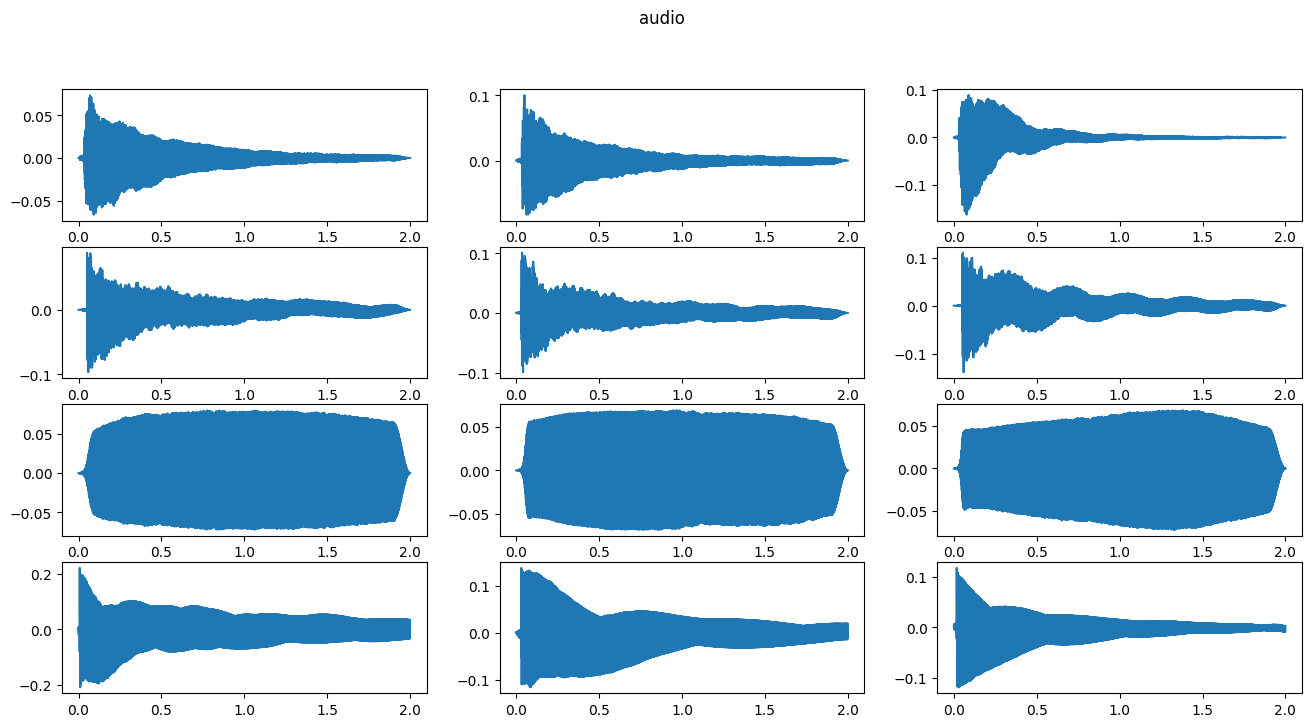

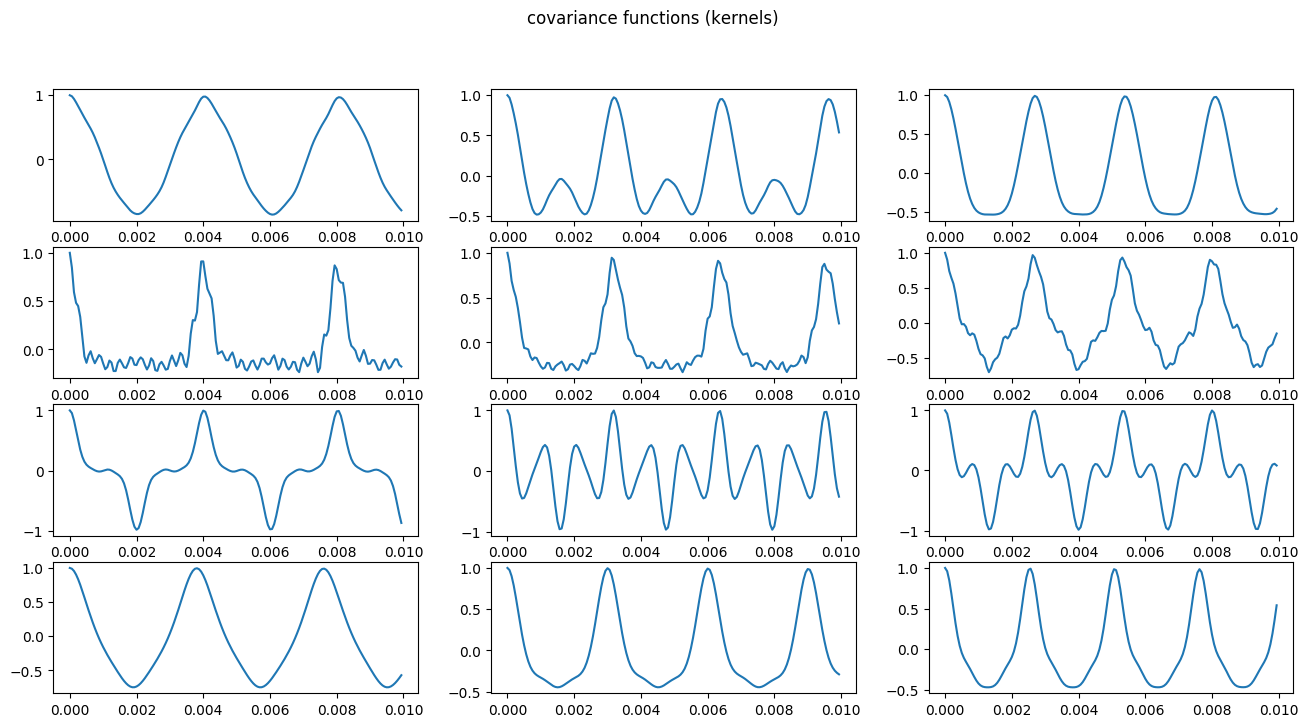

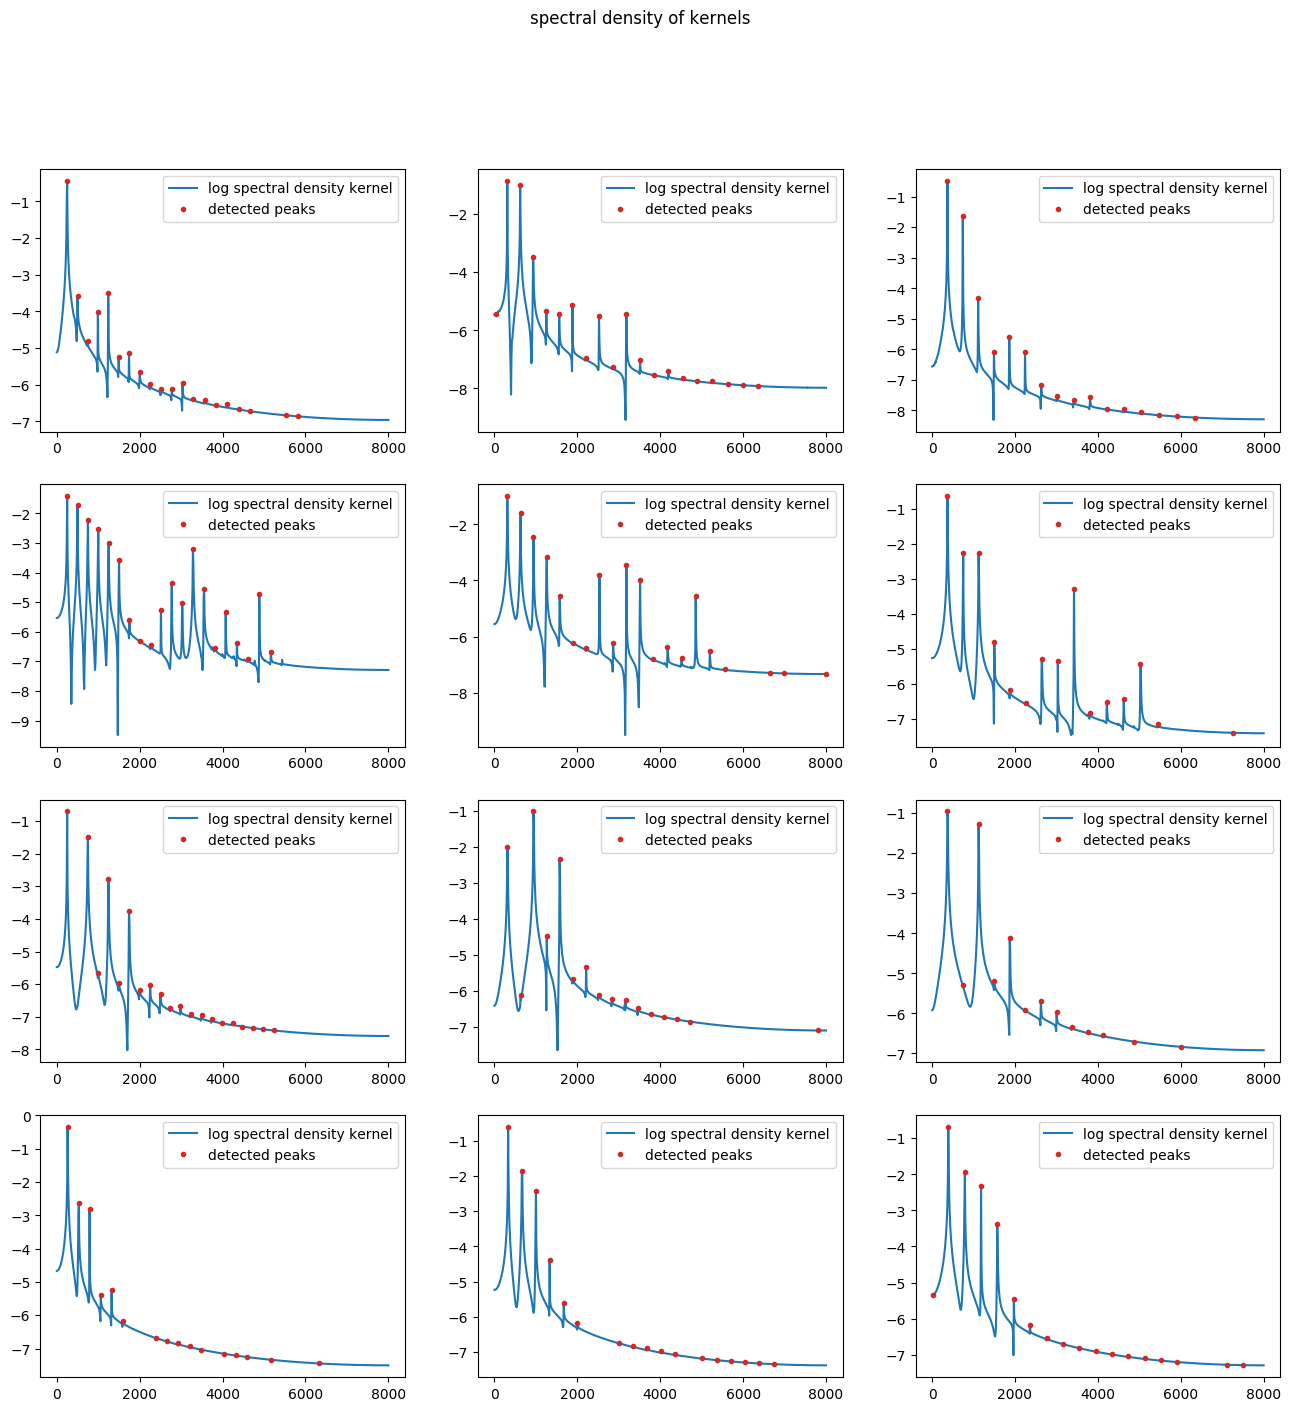

In [6]:
nview = 160
for i in range(ninst):
    for p in range(npitch):
        # visualization
        plt.figure(1, figsize=(16, 8)), plt.suptitle('audio')
        plt.subplot(4, 3, (i*npitch + 1) + p)
        plt.plot(x[i][p], y[i][p])
        
        plt.figure(3, figsize=(16, 8)), plt.suptitle('covariance functions (kernels)')
        plt.subplot(4, 3, (i*npitch + 1) + p)
        plt.plot(x_kern[i][p][0:nview], kern[i][p][0:nview]);
        
        plt.figure(5, figsize=(16, 16)), plt.suptitle('spectral density of kernels')
        plt.subplot(4, 3, (i*npitch + 1) + p)
        plt.plot(peak_detec[i][p][2], np.log(peak_detec[i][p][3]))  
        plt.plot(peak_detec[i][p][0], np.log(peak_detec[i][p][1]), '.C3')
        plt.legend(['log spectral density kernel', 'detected peaks']);